<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


In [1]:
import piplite as pl
await pl.install(['seaborn', 'scikit-learn'])

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

## Importing the Dataset


In [3]:
data = pd.read_csv('car_price_dataset.csv')
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


**Car Price Dataset** from Kaggle contains information about various cars, including their specifications and prices. There are 9 columns with no NULL value in this dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 625.1+ KB


In [5]:
data.select_dtypes(include='object').nunique()

Brand           10
Model           30
Fuel_Type        4
Transmission     3
dtype: int64

In [6]:
data.select_dtypes(exclude='object')

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
0,2020,4.2,289944,3,5,8501
1,2012,2.0,5356,2,3,12092
2,2020,4.2,231440,4,2,11171
3,2023,2.0,160971,2,1,11780
4,2003,2.6,286618,3,3,2867
...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884
9996,2002,1.4,168000,2,1,6240
9997,2010,3.0,86664,5,1,9866
9998,2002,1.4,225772,4,1,4084


In [7]:
data.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [8]:
data.shape

(10000, 10)

### Data distribution

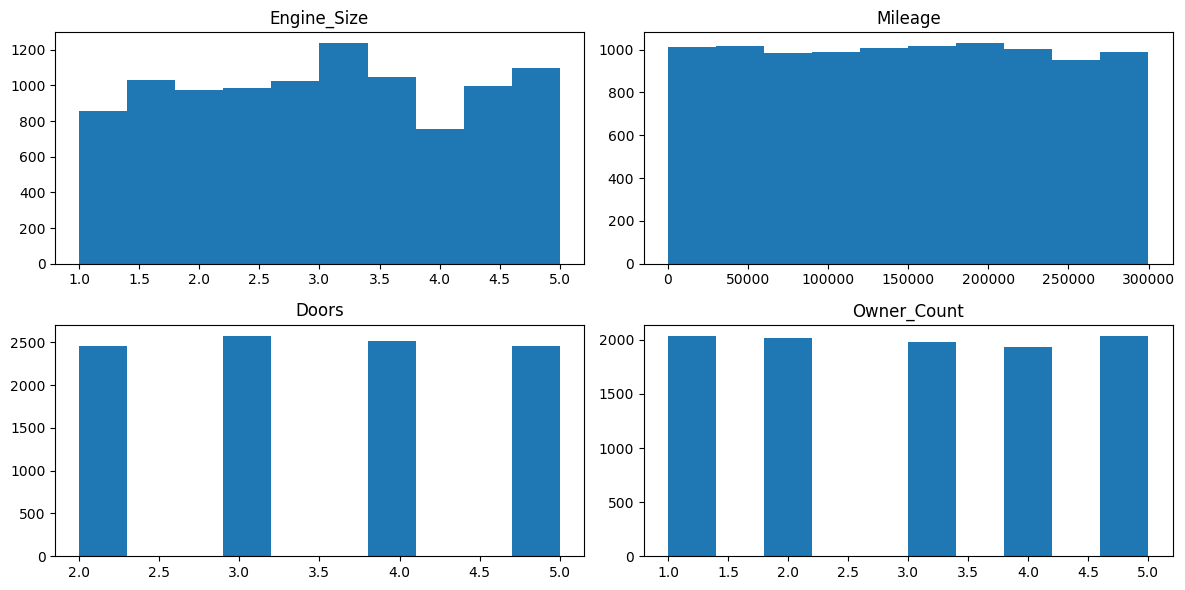

In [9]:
dist_col = ['Engine_Size','Mileage','Doors','Owner_Count']
num = [(0,0),(0,1),(1,0),(1,1)]
fig, f = plt.subplots(2,2, figsize=(12,6))
for col, (x, y) in zip(dist_col, num):
    f[x,y].hist(data[col])
    f[x,y].set(title=col)
    
plt.tight_layout()
plt.show()

# 2. Objectives


It will be used for regression analysis to predict car `Prices` based on features like `Year`, `Engine_Size`, `Mileage`, `Doors`. Some procedures will be proceeded before modelling, as per following:  
- Transform polynomial features
- Standardize and scaling data
- Model fitting
- Model evaluation and
- Decision making on which model will be used.

**Remark**: Pipeline method will be used for simplicity.

In [12]:
X = data[['Year','Engine_Size','Mileage','Doors','Owner_Count']]
y = data['Price']

# 3. Linear Regression Models


In [17]:
X_ss = StandardScaler().fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=.2, random_state=12453)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

### Simple Linear Regression

In [19]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_pred_slr = slr.predict(X_test)
r2_score(y_test, y_pred_slr)

0.8784887982531328

In [27]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)
slr_s = LinearRegression()
slr_s.fit(X_train_s, y_train)
y_pred_slr = slr_s.predict(X_test_s)

### Multiple Linear Regression

In [28]:
pipe = Pipeline([('polynomial', PolynomialFeatures()),
                 ('scaling', StandardScaler()),
                 ('l-regression', LinearRegression())])

pipe.fit(X_train, y_train)
y_pred_mlr = pipe.predict(X_test)

### Lasso Regression

In [29]:
pipe_las = Pipeline([('polynomial', PolynomialFeatures()),
                     ('scaling', StandardScaler()),
                     ('lasso', Lasso(alpha=0.1))])

pipe_las.fit(X_train, y_train)
y_pred_las = pipe_las.predict(X_test)

### Ridge Regression

In [30]:
pipe_ridg = Pipeline([('polynomial', PolynomialFeatures()),
                     ('scaling', StandardScaler()),
                     ('ridge', Ridge(alpha=0.1))])

pipe_ridg.fit(X_train, y_train)
y_pred_ridg = pipe_ridg.predict(X_test)

# 4. Insights and key findings


### Model Evaluation

In [36]:
def evaluation(name, pred, test=y_test):
    mse = mean_squared_error(test, pred)
    r2  = r2_score(test, pred)
    print(f"R^2 score: {r2:.6f} | MSE: {mse:.0f} [{name}]")

evaluation("Simple Linear Regression", y_pred_slr)
evaluation("Multiple Linear Regression", y_pred_mlr)
evaluation("Lasso Regression", y_pred_las)
evaluation("Ridge Linear Regression", y_pred_ridg)

R^2 score: 0.878489 | MSE: 1182849 [Simple Linear Regression]
R^2 score: 0.878304 | MSE: 1184649 [Multiple Linear Regression]
R^2 score: 0.878306 | MSE: 1184625 [Lasso Regression]
R^2 score: 0.878304 | MSE: 1184652 [Ridge Linear Regression]


The highest value of **R-squared** and the lowest **Mean-Squared-Error** are observed in Simple Linear Regression. As per the model evaluation, `Simple Linear Regression` is the simplest and easy to interpret.

# 5. Next Steps


It is better to add other relevant conditional features like `safety rating`, `wheel drive types`, `length`, `height`, `weight` and so on. Those information may support for more accurate prediction.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
